In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [39]:
df.shape

(400, 26)

In [40]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [41]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [42]:


# A. Step 1: Replace invalid entries like '?'
df.replace(['?', 'NA', 'Na', 'nan', '-', ''], np.nan, inplace=True)

# B. Step 2: Fix object-type numeric columns
numeric_object_cols = ['pcv', 'wc', 'rc']
for col in numeric_object_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert to float
    df[col].fillna(df[col].median(), inplace=True)     # fill NaN with median

# C. Step 3: Handle all remaining numeric columns
# (you can list all known numeric cols or auto-detect them)
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # just in case
    df[col].fillna(df[col].median(), inplace=True)

# D. Step 4: Handle categorical columns
# Define valid categories to prevent pollution
cat_cols_expected = {
    'rbc': ['normal', 'abnormal'],
    'pc': ['normal', 'abnormal'],
    'pcc': ['present', 'notpresent'],
    'ba': ['present', 'notpresent'],
    'htn': ['yes', 'no'],
    'dm': ['yes', 'no'],
    'cad': ['yes', 'no'],
    'appet': ['good', 'poor'],
    'pe': ['yes', 'no'],
    'ane': ['yes', 'no'],
    'classification': ['ckd', 'notckd']
}

for col, valid_values in cat_cols_expected.items():
    # Only keep valid categories, rest → NaN
    df[col] = df[col].where(df[col].isin(valid_values), np.nan)
    # Fill NaNs with mode
    df[col].fillna(df[col].mode()[0], inplace=True)

# ✅ Done! Your DataFrame now has:
# - Clean numeric columns with median imputation
# - Clean categorical columns with mode imputation


C:\Users\ASHOK\AppData\Local\Temp\ipykernel_17536\1880449753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)     # fill NaN with median
C:\Users\ASHOK\AppData\Local\Temp\ipykernel_17536\1880449753.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [43]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,normal,normal,notpresent,notpresent,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,normal,normal,notpresent,notpresent,...,36.0,8000.0,4.8,no,no,no,good,no,no,ckd
7,7,24.0,80.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900.0,5.0,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600.0,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd


In [44]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


# Make a copy for encoding
df_encoded = df.copy()

# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Save encoder in case you want to reverse it

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [47]:
df_encoded.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,1,1,0,0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
6,6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,...,36.0,8000.0,4.8,0,0,0,0,0,0,0
7,7,24.0,80.0,1.015,2.0,4.0,1,0,0,0,...,44.0,6900.0,5.0,0,1,0,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,33.0,9600.0,4.0,1,1,0,0,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0


In [48]:
df_encoded.describe().T


,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.750,199.50,299.250,399.000
age,400.0,51.562500,16.982996,2.000,42.000,55.00,64.000,90.000
bp,400.0,76.575000,13.489785,50.000,70.000,80.00,80.000,180.000
sg,400.0,1.017712,0.005434,1.005,1.015,1.02,1.020,1.025
al,400.0,0.900000,1.313130,0.000,0.000,0.00,2.000,5.000
su,400.0,0.395000,1.040038,0.000,0.000,0.00,0.000,5.000
rbc,400.0,0.882500,0.322418,0.000,1.000,1.00,1.000,1.000
pc,400.0,0.810000,0.392792,0.000,1.000,1.00,1.000,1.000
pcc,400.0,0.105000,0.306937,0.000,0.000,0.00,0.000,1.000
ba,400.0,0.055000,0.228266,0.000,0.000,0.00,0.000,1.000


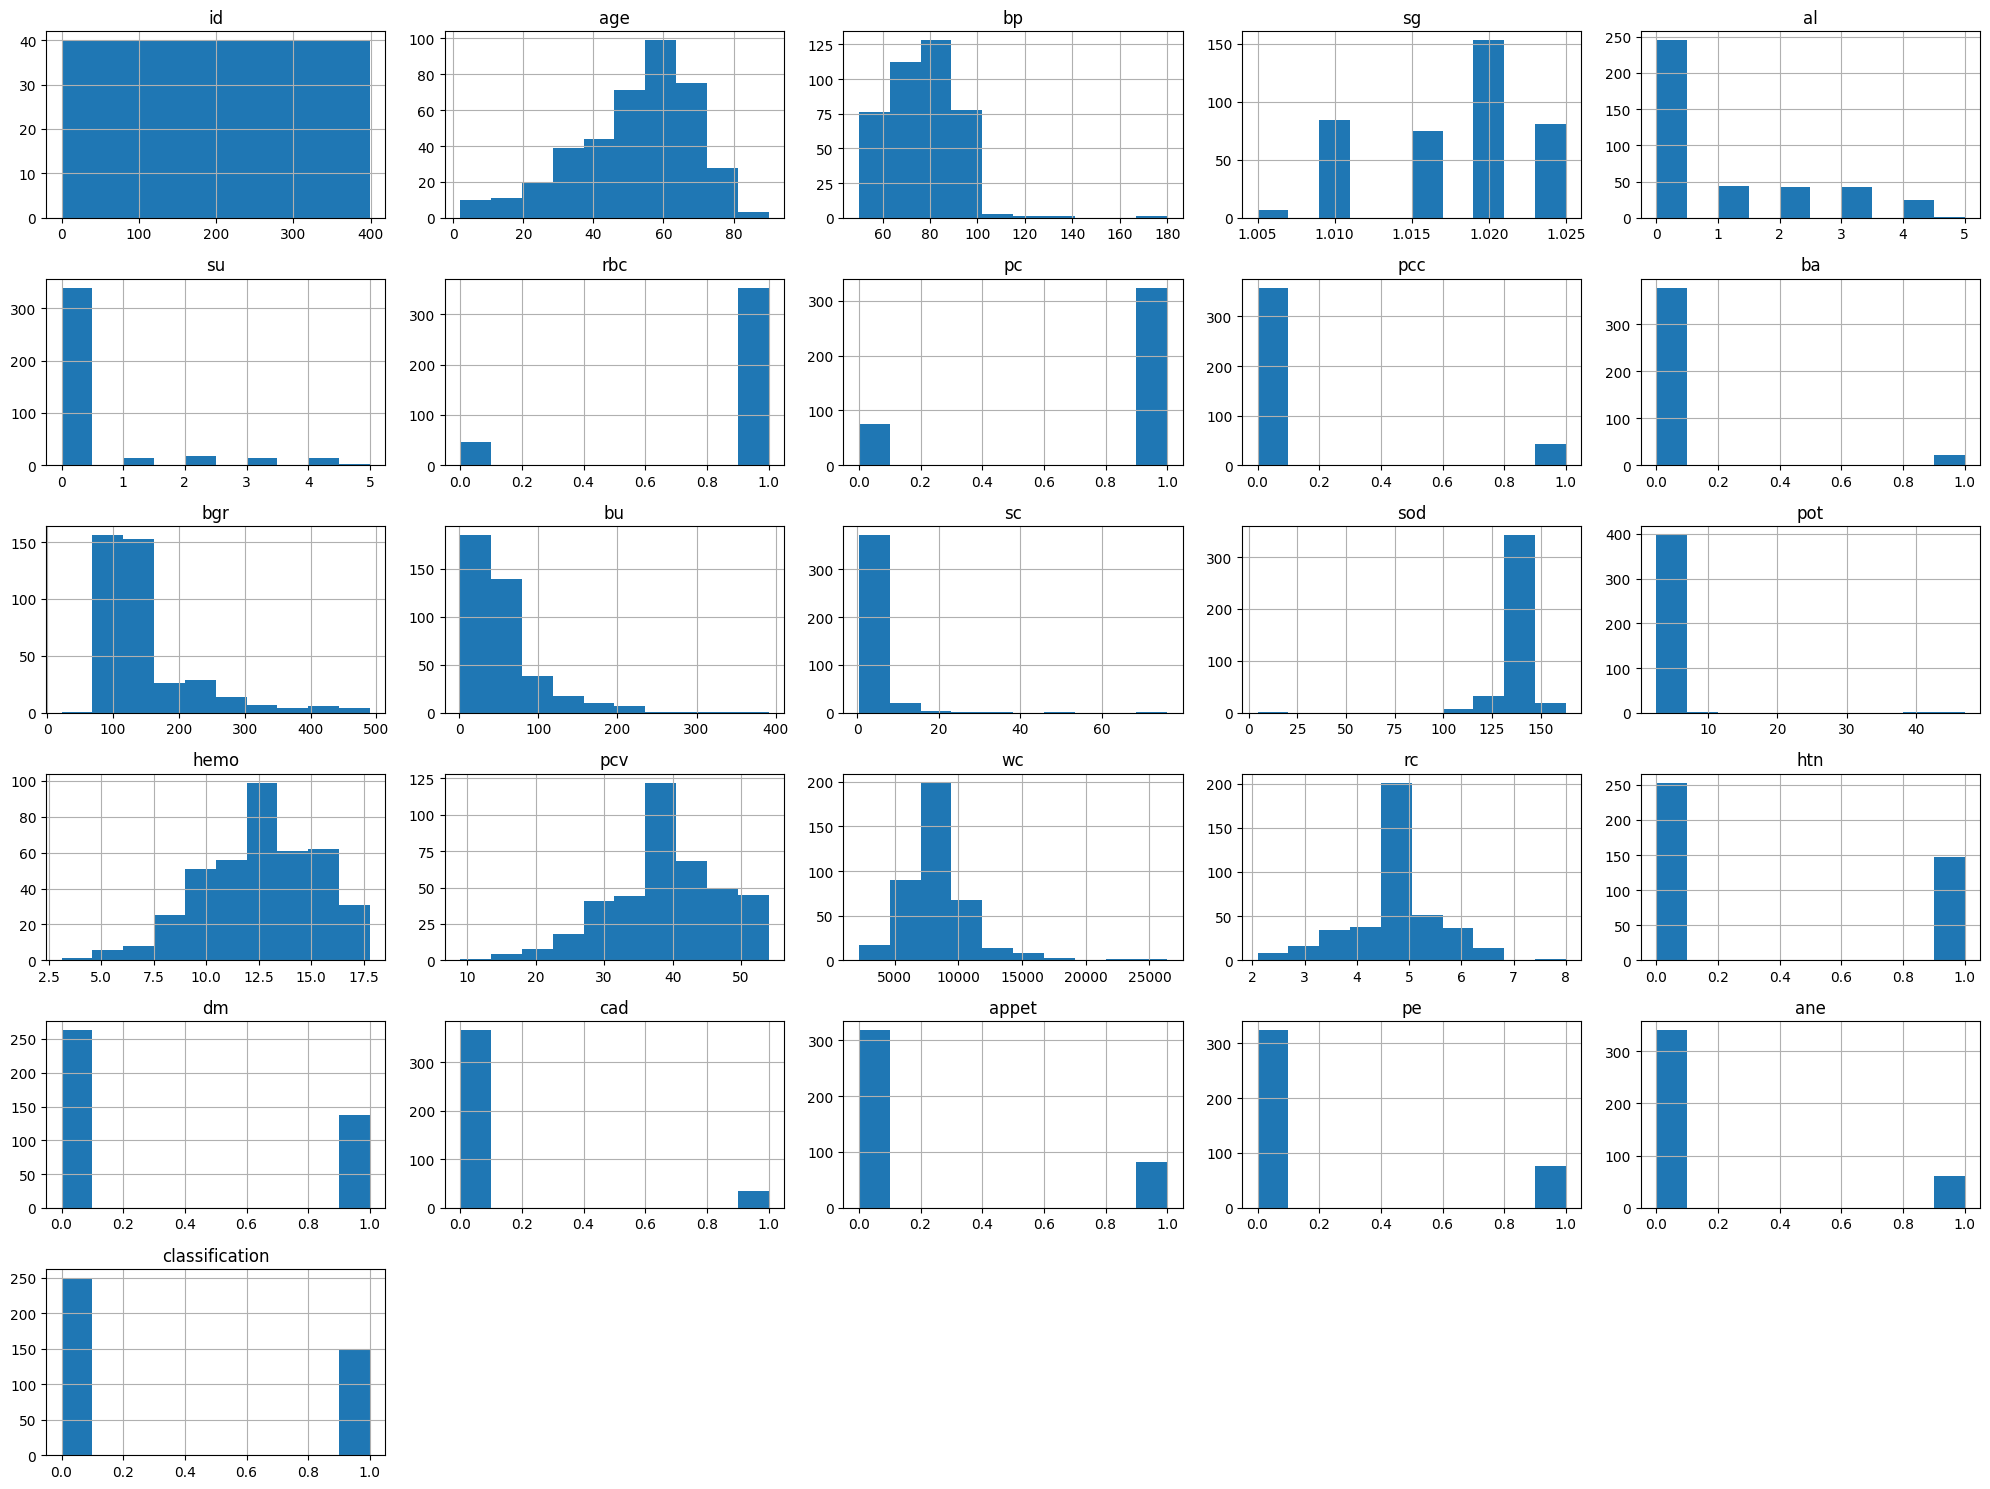

In [49]:
# histogram to understand the distibution
df_encoded.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

In [50]:
df_encoded.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [51]:
x = df_encoded.drop(['id', 'classification'], axis=1)
y = df_encoded['classification']


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

In [52]:
x_train.value_counts()
y_train.value_counts()

classification
0    175
1    105
Name: count, dtype: int64

In [53]:
pipeline = Pipeline([ 
    ('scaler', StandardScaler()), 
    ('logreg', LogisticRegression())
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('logreg', LogisticRegression())])

In [54]:
y_pred = pipeline.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        75
           1       0.98      1.00      0.99        45

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

[[74  1]
 [ 0 45]]
Model accuracy score : 0.9917


In [55]:
import pickle

# Assume `pipeline` is your trained pipeline (Scaler + LogisticRegression)
with open('kidney_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)
